In [1]:
# import modules
from keras.datasets import cifar100
from keras.layers import Dense, Conv2D, Reshape, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data Load
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train.shape

(50000, 32, 32, 3)

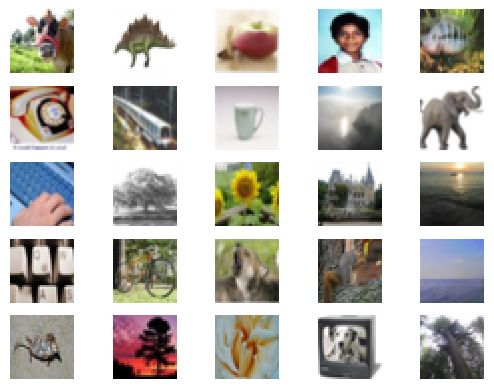

In [50]:
# Data Visualization
fig, ax = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[5*i + j])
        ax[i][j].axis('off')
plt.show()

In [3]:
# Data Preprocessing

x_train = x_train.astype('float16') / 255.0
x_test = x_test.astype('float16') / 255.0
x_train = tf.convert_to_tensor(x_train, dtype='float16')
x_test = tf.convert_to_tensor(x_test, dtype='float16')

print(x_train[20][14])
print(x_train.shape)

tf.Tensor(
[[0.643  0.643  0.643 ]
 [0.608  0.608  0.612 ]
 [0.5605 0.5527 0.545 ]
 [0.4626 0.4236 0.3804]
 [0.4707 0.4353 0.3804]
 [0.447  0.4119 0.392 ]
 [0.5605 0.5137 0.4863]
 [0.702  0.6626 0.639 ]
 [0.647  0.6353 0.604 ]
 [0.537  0.4941 0.4666]
 [0.4626 0.408  0.392 ]
 [0.4119 0.4197 0.4197]
 [0.4392 0.4275 0.408 ]
 [0.5137 0.506  0.4824]
 [0.549  0.5137 0.498 ]
 [0.502  0.498  0.4941]
 [0.702  0.706  0.7217]
 [0.5728 0.5884 0.612 ]
 [0.502  0.5215 0.5527]
 [0.498  0.506  0.51  ]
 [0.447  0.3765 0.3176]
 [0.6626 0.5728 0.4863]
 [0.5566 0.4353 0.3608]
 [0.5566 0.502  0.4746]
 [0.5845 0.5845 0.5605]
 [0.604  0.604  0.5605]
 [0.6196 0.6157 0.565 ]
 [0.6    0.5884 0.5605]
 [0.612  0.6    0.5527]
 [0.604  0.596  0.533 ]
 [0.6    0.5923 0.5215]
 [0.5767 0.569  0.5215]], shape=(32, 3), dtype=float16)
(50000, 32, 32, 3)


In [5]:
# Create Model

batch_size = 128

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                        

In [30]:
# Model Compile and Training
es_call = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)


model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['acc'])
#history = model.fit_generator(flow_tr_gen, steps_per_epoch=len(flow_tr_gen), 
#                  epochs=80, validation_data=flow_val_gen, validation_steps=len(flow_val_gen), callbacks=[es_call])
with tf.device('/device:GPU:0'):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=80, validation_split=0.2, callbacks=[es_call])

Epoch 1/80
313/313 [==============================] - 5s 13ms/step - loss: 0.9319 - acc: 0.7097 - val_loss: 1.7787 - val_acc: 0.5742
Epoch 2/80
313/313 [==============================] - 4s 12ms/step - loss: 0.9236 - acc: 0.7136 - val_loss: 1.7686 - val_acc: 0.5716
Epoch 3/80
313/313 [==============================] - 4s 12ms/step - loss: 0.9328 - acc: 0.7143 - val_loss: 1.7983 - val_acc: 0.5745
Epoch 4/80
313/313 [==============================] - 4s 12ms/step - loss: 0.9239 - acc: 0.7132 - val_loss: 1.8309 - val_acc: 0.5565
Epoch 5/80
313/313 [==============================] - 4s 12ms/step - loss: 0.9195 - acc: 0.7146 - val_loss: 1.7871 - val_acc: 0.5687
Epoch 6/80
313/313 [==============================] - 4s 12ms/step - loss: 0.9131 - acc: 0.7162 - val_loss: 1.8170 - val_acc: 0.5567
Epoch 7/80
313/313 [==============================] - 4s 12ms/step - loss: 0.9183 - acc: 0.7155 - val_loss: 1.7798 - val_acc: 0.5774
Epoch 7: early stopping


In [63]:
model.save('CIFAR100_Keras_Final_2.h5')

In [8]:
def Plotting(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'bo', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'bo', label='Validation Loss')
    plt.title('Trianing and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')
    plt.show()

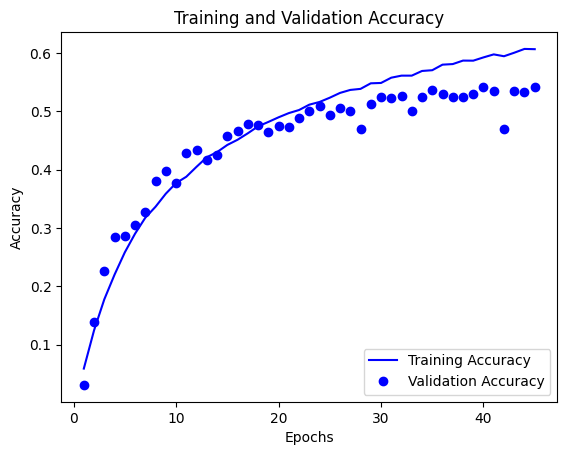

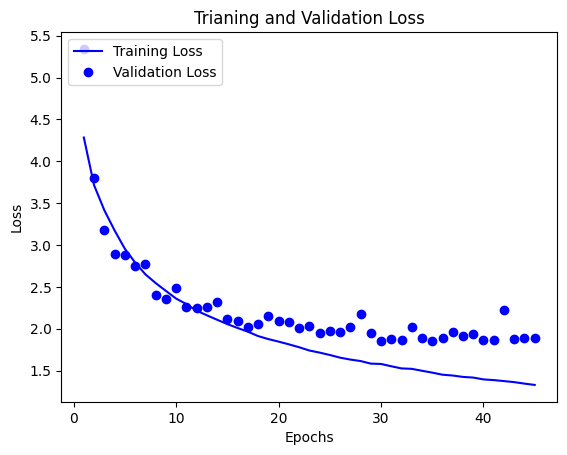

In [9]:
Plotting(history)

In [29]:
preds = model.evaluate(x_test, y_test)
print(preds)

313/313 [==============================] - 1s 3ms/step - loss: 1.7240 - acc: 0.5747
[1.724000334739685, 0.5746999979019165]


In [75]:
# Model Compile and Training
batch_size = 128
es_call = EarlyStopping(monitor='val_loss', mode='min', patience=1, verbose=1)
#history = model.fit_generator(flow_tr_gen, steps_per_epoch=len(flow_tr_gen), 
#                  epochs=80, validation_data=flow_val_gen, validation_steps=len(flow_val_gen), callbacks=[es_call])
with tf.device('/device:GPU:0'):
    model = keras.models.load_model('CIFAR100_Keras_Final_2.h5')

    model.compile(optimizer=Adam(learning_rate=5e-5, beta_2=0.99), loss='sparse_categorical_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=80, validation_split=0.2, callbacks=[es_call])

Epoch 1/80
313/313 [==============================] - 3s 8ms/step - loss: 0.9938 - acc: 0.6943 - val_loss: 1.7533 - val_acc: 0.6000
Epoch 2/80
313/313 [==============================] - 2s 7ms/step - loss: 0.9941 - acc: 0.6938 - val_loss: 1.7596 - val_acc: 0.5992
Epoch 2: early stopping


In [76]:
preds = model.evaluate(x_test, y_test)
print(preds)

313/313 [==============================] - 1s 3ms/step - loss: 1.7679 - acc: 0.5990
[1.7679046392440796, 0.5989999771118164]
